In [1]:
using InMemoryDatasets, StatisticalGraphics, DLMReader

`BoxPlot` produces box-whisker chart

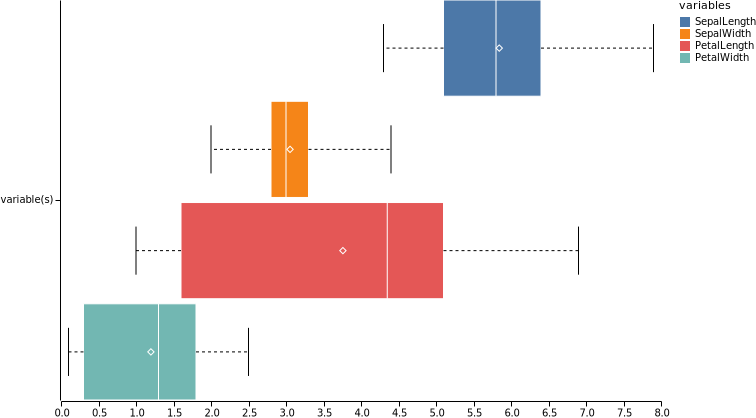

In [2]:
iris = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                                 "..", "docs", "assets", "iris.csv"))
sgplot(iris, BoxPlot(x=1:4))

Setting `outliers=true` add outlier points to the plot. The `outliersfactor` keyword controls the factor of outlierness.

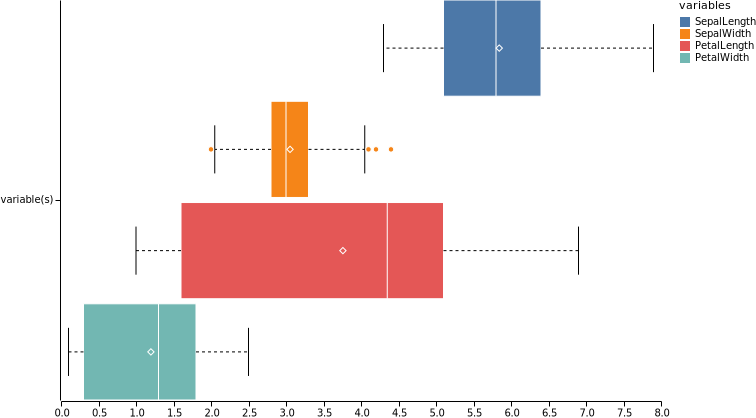

In [3]:
sgplot(iris, BoxPlot(x=1:4, outliers=true))

The following examples show how the properties of box plots can be customised

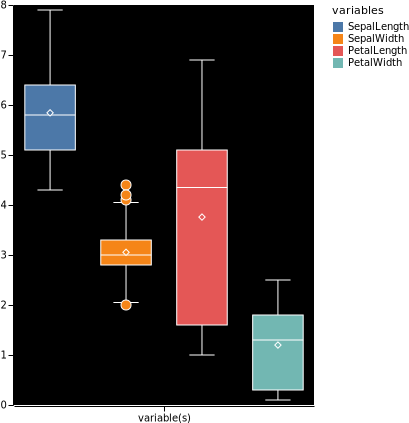

In [4]:
sgplot(iris, BoxPlot(y=1:4, outliers=true,
                        boxwidth=0.7,
                        whiskerdash=[0],
                        whiskercolor=:white,
                        fencecolor=:white,
                        outliersymbolsize=100),
                        width=300,
                        wallcolor=:black)

**[Box Plot](https://observablehq.com/@d3/box-plot)**

Reproducing an example from the [`D3`](http://d3js.org)`s examples collection.

Using the `format` feature of `InMemoryDataset` to manually bin data before plotting a box plot.

┌ Warning: the last line is not ended with `end of line` character
└ @ DLMReader ~/.julia/packages/DLMReader/gB2Mj/src/reader.jl:449


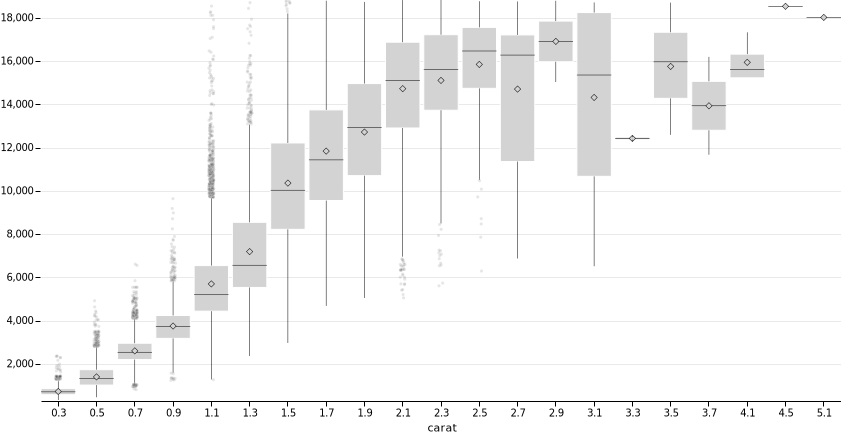

In [5]:
diamond = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                           "..", "docs", "assets", "diamonds.csv"))
carat_fmt(x) = round((searchsortedfirst(0.19:0.2:5.02, x)-2)*.2 + 0.3, digits=2)
setformat!(diamond, :carat=>carat_fmt)

sgplot(
        diamond,
        BoxPlot(y=:price, category =:carat,
                mediancolor=:black, medianthickness = 0.5,
                fencewidth=0,
                whiskerdash=[0], whiskerthickness = 0.5,

                outliers = true,
                outlierjitter = 5,
                outliersymbolsize=10,
                outliercolor=:black,
                outlieropacity=0.1
              ),
        yaxis=Axis(domain = false, nice=false, grid=true),
        groupcolormodel=["lightgray"],
        legend=false,
        width=800
      )

Users can pass name of a column as `category` to produce separate `BoxPlot` for each level the passed column,

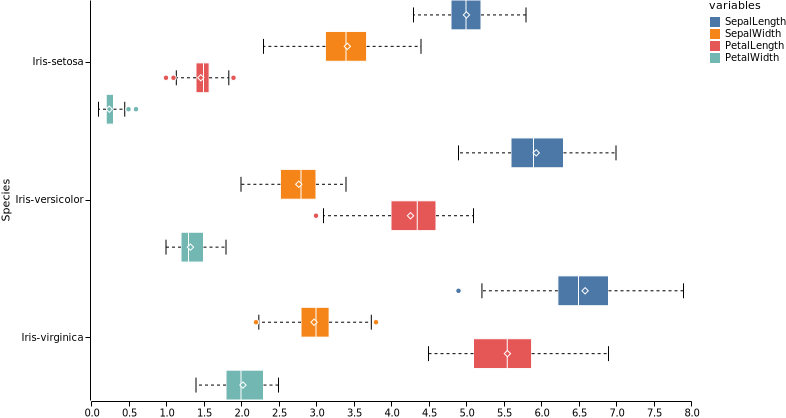

In [6]:
sgplot(iris, BoxPlot(x=1:4, category=5, outliers=true))

As another example

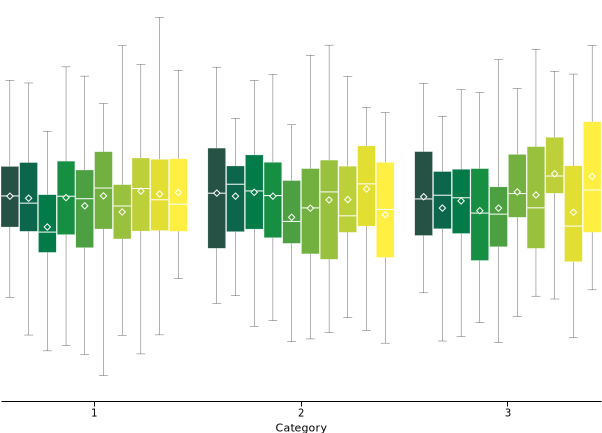

In [7]:
ds = Dataset(randn(100, 10), :auto)

insertcols!(ds, :Category=>rand(1:3, nrow(ds)))

sgplot(ds, BoxPlot(y=1:10, category=:Category,
                      whiskerdash=[0],
                      outlinethickness=0.3,
                      whiskerthickness=0.3),
                      groupcolormodel=Dict(:scheme=>:darkgreen),
                      yaxis=Axis(show=false),
                      legend=false,
                      clip=false
                      )

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*